# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-8.1.--The-standard-basis" data-toc-modified-id="Exercise-8.1.--The-standard-basis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 8.1.  The standard basis</a></div><div class="lev1 toc-item"><a href="#Exercise-8.2.--Encoding-data" data-toc-modified-id="Exercise-8.2.--Encoding-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 8.2.  Encoding data</a></div><div class="lev1 toc-item"><a href="#Exercise-8.3.-Orthogonal-matrices-and-eigenvalues" data-toc-modified-id="Exercise-8.3.-Orthogonal-matrices-and-eigenvalues-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 8.3. Orthogonal matrices and eigenvalues</a></div><div class="lev1 toc-item"><a href="#Exercise-8.4.-Nonconvexity-of-the-linear-Autoencoder" data-toc-modified-id="Exercise-8.4.-Nonconvexity-of-the-linear-Autoencoder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 8.4. Nonconvexity of the linear Autoencoder</a></div><div class="lev1 toc-item"><a href="#Exercise-8.5.-Minimizing-the-linear-Autoencoder-over-a-toy-dataset" data-toc-modified-id="Exercise-8.5.-Minimizing-the-linear-Autoencoder-over-a-toy-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 8.5. Minimizing the linear Autoencoder over a toy dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-8.6.-Producing-a-PCA-basis" data-toc-modified-id="Exercise-8.6.-Producing-a-PCA-basis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 8.6. Producing a PCA basis</a></div><div class="lev1 toc-item"><a href="#Exercise-8.7.-A-warning-example" data-toc-modified-id="Exercise-8.7.-A-warning-example-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 8.7. A warning example</a></div><div class="lev1 toc-item"><a href="#Exercise-8.8.-Perform-K-Means" data-toc-modified-id="Exercise-8.8.-Perform-K-Means-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 8.8. Perform K-Means</a></div><div class="lev1 toc-item"><a href="#Exercise-8.9.-Making-a-scree-plot" data-toc-modified-id="Exercise-8.9.-Making-a-scree-plot-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 8.9. Making a scree plot</a></div><div class="lev1 toc-item"><a href="#Exercise-8.10.-Alternating-minimization" data-toc-modified-id="Exercise-8.10.-Alternating-minimization-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 8.10. Alternating minimization</a></div>

In [1]:
# load in basic libraries and autograd wrapped numpy
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn import datasets
import pandas as pd
datapath = '../mlrefined_datasets/unsuperlearn_datasets/'
from autograd import numpy as np

# import custom libraries
from mlrefined_libraries import unsupervised_library as unsuplib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer();
plotter = superlearn.multi_outupt_plotters

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 8.1.  The standard basis

To represent a data point $\mathbf{x}_p$ over the standard basis is a trivial affair, and one can easily check that the perfect weights must be defined as

\begin{equation}
w_{n,\,p} = x_{n,\,p}
\end{equation}

i.e., each weight is simply equal to the value of the data point we aim to represent.  For most any other spanning set however these weights must be solved for numerically, which we frame in terms of a cost function minimization after the examples below.

# Exercise 8.2.  Encoding data

<IPython.core.display.Javascript object>


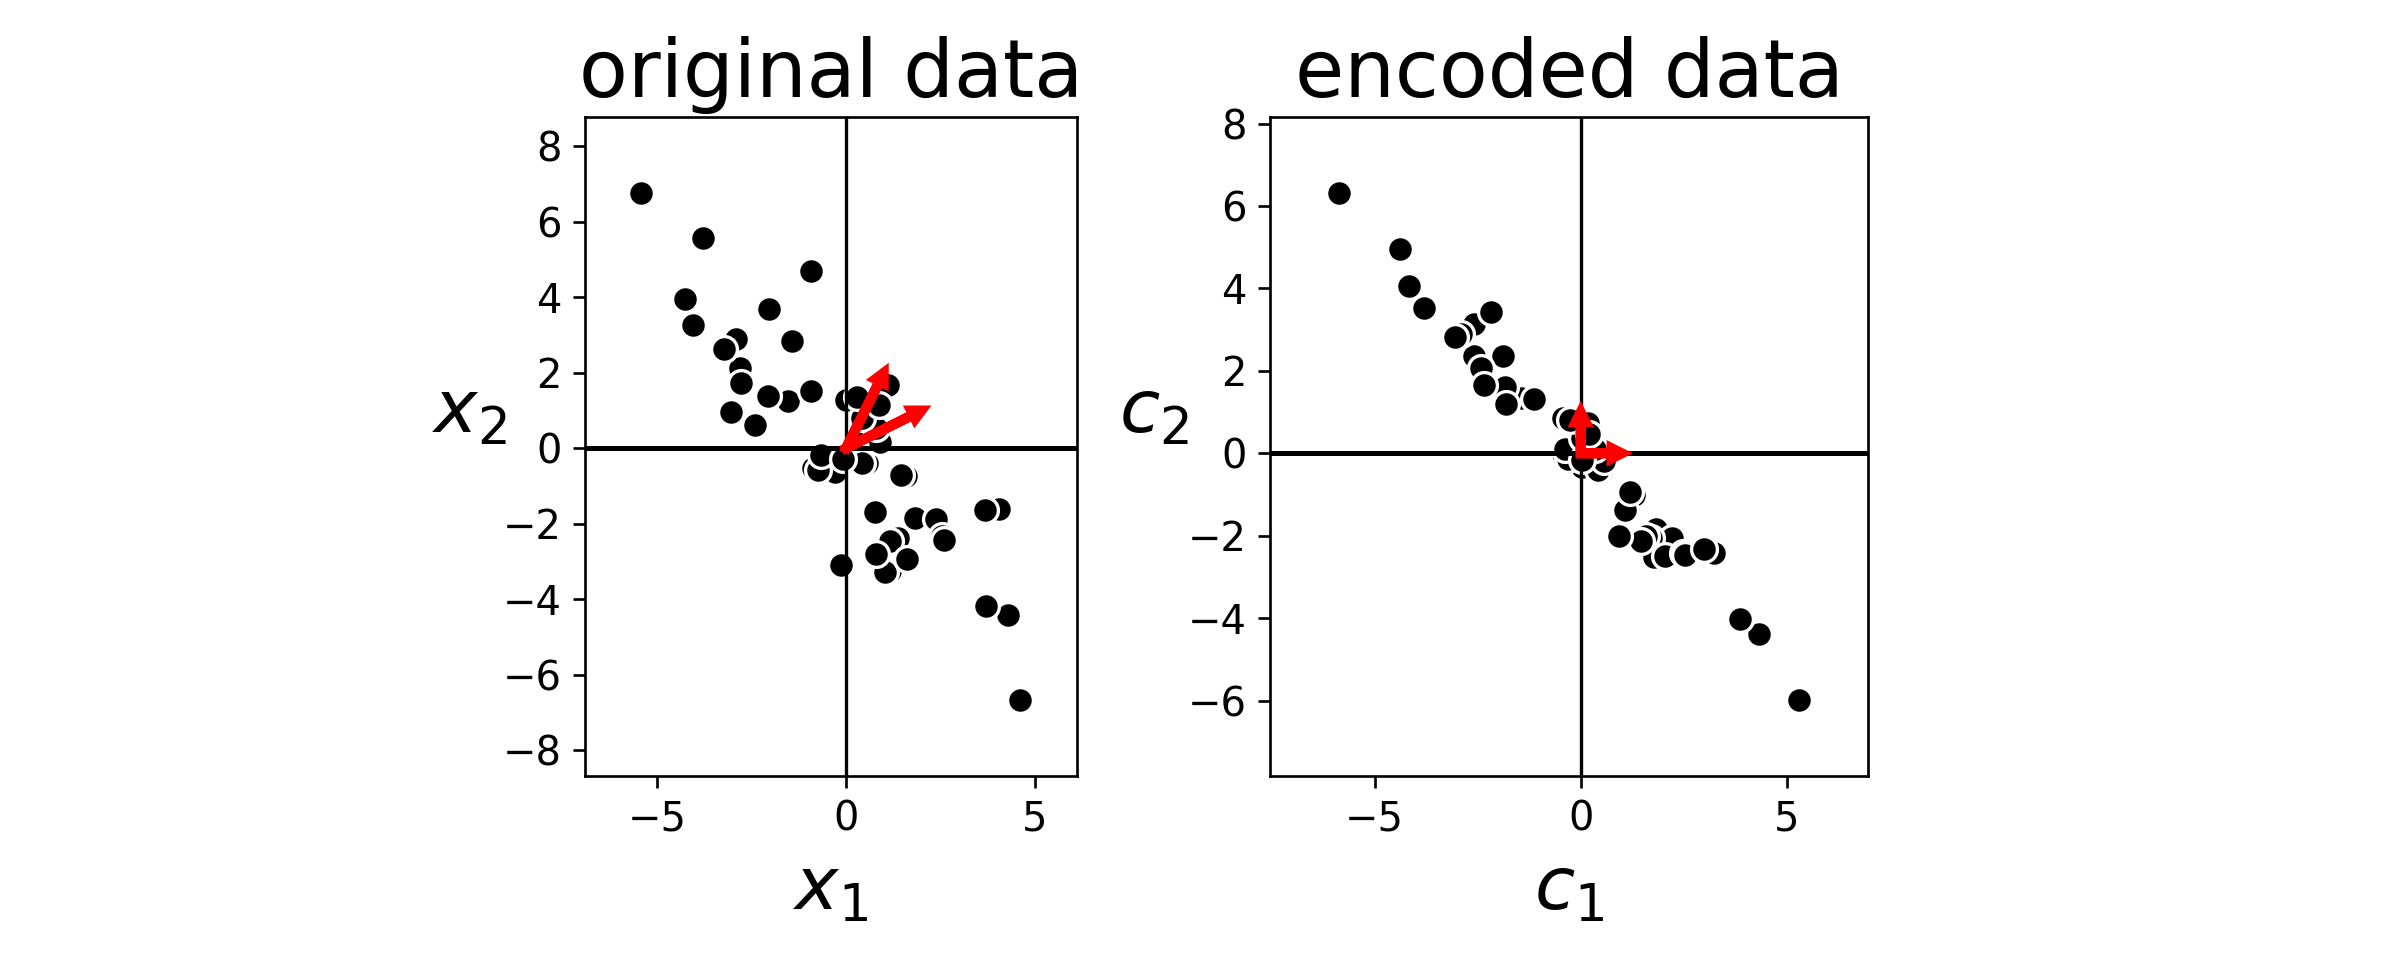

In [3]:
# This code cell will not be shown in the HTML version of this notebook
def center(X):
    '''
    A function for normalizing each feaure dimension of an input array, mean-centering
    and division by its standard deviation
    
    '''
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

# load in dataset to perform PCA on
X_original = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')

# center data
X = center(X_original)

# plot data and spanning set, and tranformed version
C = np.array([[2,1],[1,2]])
unsuplib.span_animation.perfect_visualize_transform_static(C,X=X)

# Exercise 8.3. Orthogonal matrices and eigenvalues

First suppose that $\mathbf{C}$ is an $N\times K$ orthogonal matrix.  Note that if $\lambda$ is an eigenvalue of $\mathbf{C}\mathbf{C}^T$, then by definition

\begin{equation}
\mathbf{C}\mathbf{C}^T\mathbf{v} = \lambda \mathbf{v}
\end{equation}

for some corresponding eigenvector $\mathbf{v}$. It then follows that multiplying both sides of the above by $\mathbf{C}^T$ we have

\begin{equation}
\mathbf{C}^T\mathbf{C}\mathbf{C}^T\mathbf{v} = \mathbf{C}^T\mathbf{C}\left(\mathbf{C}^T\mathbf{v}\right) = \lambda \left(\mathbf{C}^T\mathbf{v}\right).
\end{equation}

This implies that $\lambda$ is an eigenvalue of $\mathbf{C}^T\mathbf{C}$ with corresponding eigenvector $\mathbf{C}^T\mathbf{v}$.  But $\mathbf{C}^T\mathbf{C} = \mathbf{I}_{K\times K}$, so all of its eigenvalues equal precisely $\lambda = +1$.  This implies that the non-zero eigenvalues of $\mathbf{C}\mathbf{C}^T$ all equal $\lambda = +1$.

Now suppose the opposite, that all non-negative eigenvalues of $\mathbf{C}\mathbf{C}^T$ equal $+1$.   Using the Raleigh quotient this means that for any eigenvector $\mathbf{v}$ associated to a non-negative eigenvalue we have

\begin{equation}
\mathbf{C}\mathbf{C}^T\mathbf{v} =  \mathbf{v}.
\end{equation}

Multiplying each side of this by $\mathbf{C}^T$

\begin{equation}
\mathbf{C}^T\mathbf{C}\mathbf{C}^T\mathbf{v} = \mathbf{C}^T \mathbf{v}.
\end{equation}

That this is true for all $K$ eigenvectors of $\mathbf{C}\mathbf{C}^T$ means that $\mathbf{C}^T\mathbf{C} = \mathbf{I}_{K\times K}$.

# Exercise 8.4. Nonconvexity of the linear Autoencoder

## and 


# Exercise 8.5. Minimizing the linear Autoencoder over a toy dataset

Now we use our standard gradient descent optimizer to tune the parameters of the autoencoder for an $N = 2$ dimensional dataset, which has already been centered.  Here we will seek out only a single learned basis vector, and examine its final encoded and decoded versions visually.  

Below we plot a number of pictures resulting from minimizing the autoencoder.  Here we show the original data along with the learned basis element shown in the left panel, the encoded data in the middle panel i.e., the value of each learned weight $\mathbf{c}^T\mathbf{x}_p = w_p$, and the decoded data  $\mathbf{c}\mathbf{c}^T\mathbf{x}_p = \mathbf{c}w_p$ in the right panel.  In the right panel we also show the linear subspace (the span of the single basis vector $\mathbf{c}$ found) in red.

In [4]:
# a quick mockup of the autoencoder model
def model(x,C):    
    # perform encoding 
    W = np.dot(C.T,X)
    
    # perform decoding 
    a = np.dot(C,W)
    return a

# an implementation of the least squares cost function for linear regression
def autoencoder(C):
    cost = np.sum((model(X,C) - X)**2)
    return cost/float(X.shape[1])

<IPython.core.display.Javascript object>


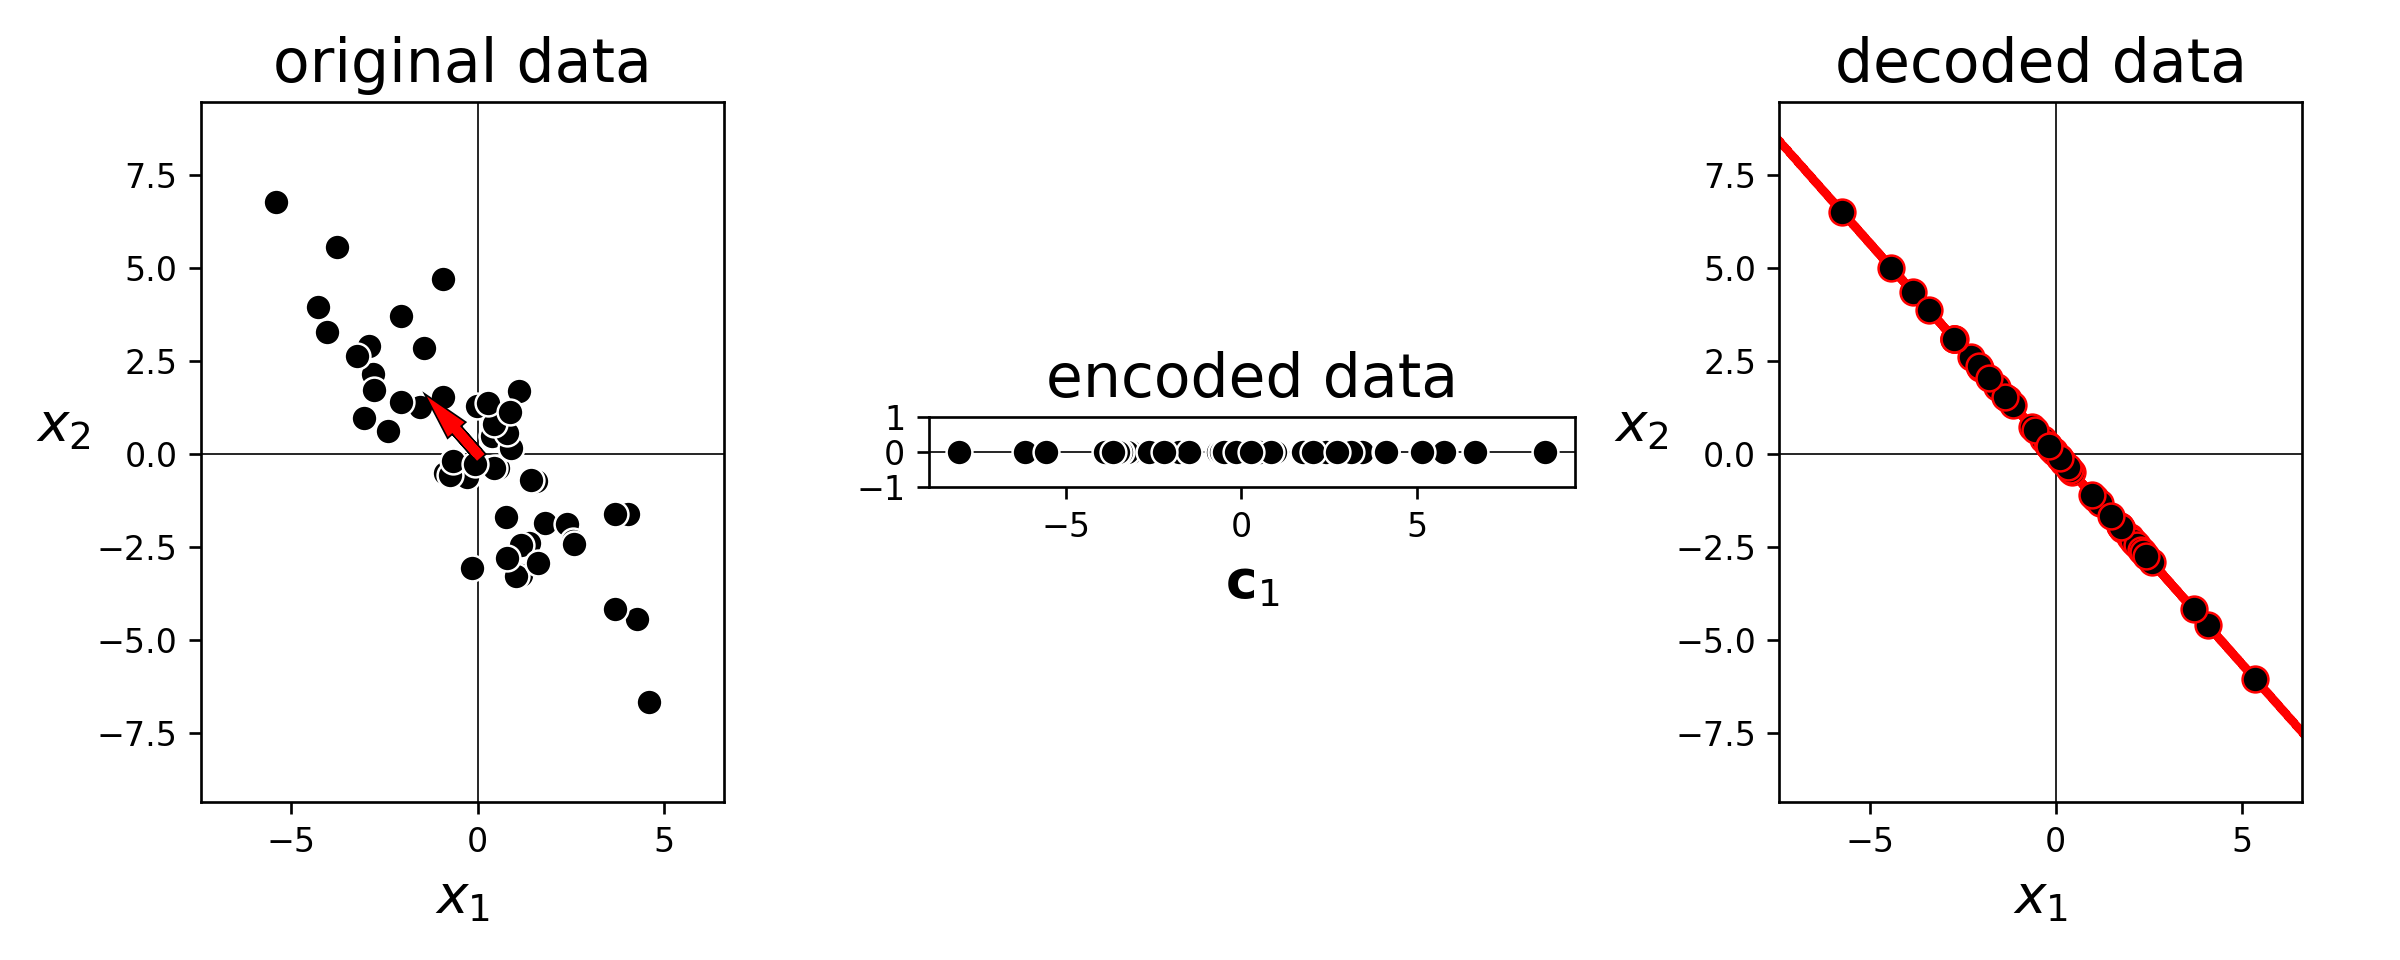

In [5]:
# This code cell will not be shown in the HTML version of this notebook
# load in a dataset to learn a PCA basis for via the autoencoder
x = np.loadtxt(datapath + '2d_span_data_centered.csv',delimiter=',')

# tune the autoencoder via gradient descent
g = autoencoder; alpha_choice = 10**(-4); max_its = 1000; C = 0.1*np.random.randn(2,1);
C = np.array([[-3.5],[3.5]])
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,C)

# display results of the autoencoder
unsuplib.autoencoder_demos.show_encode_decode(X,cost_history,weight_history,show_pc = True,scale = 150,encode_label = r'$\mathbf{c}_1$',projmap = False)

Interestingly, examining the contour plot of the autoencoder in this instance we can see that it has two global minima - located precisely at the location of the *first principal component* of the dataset - a term we define in the subsection that follows.  We show the contour plot of the autoencoder in the left panel below, and this contour plot along with the steps of gradient descent plotted on top (colored green to red, when the run starts to when it halts) in the right panel below.

<IPython.core.display.Javascript object>


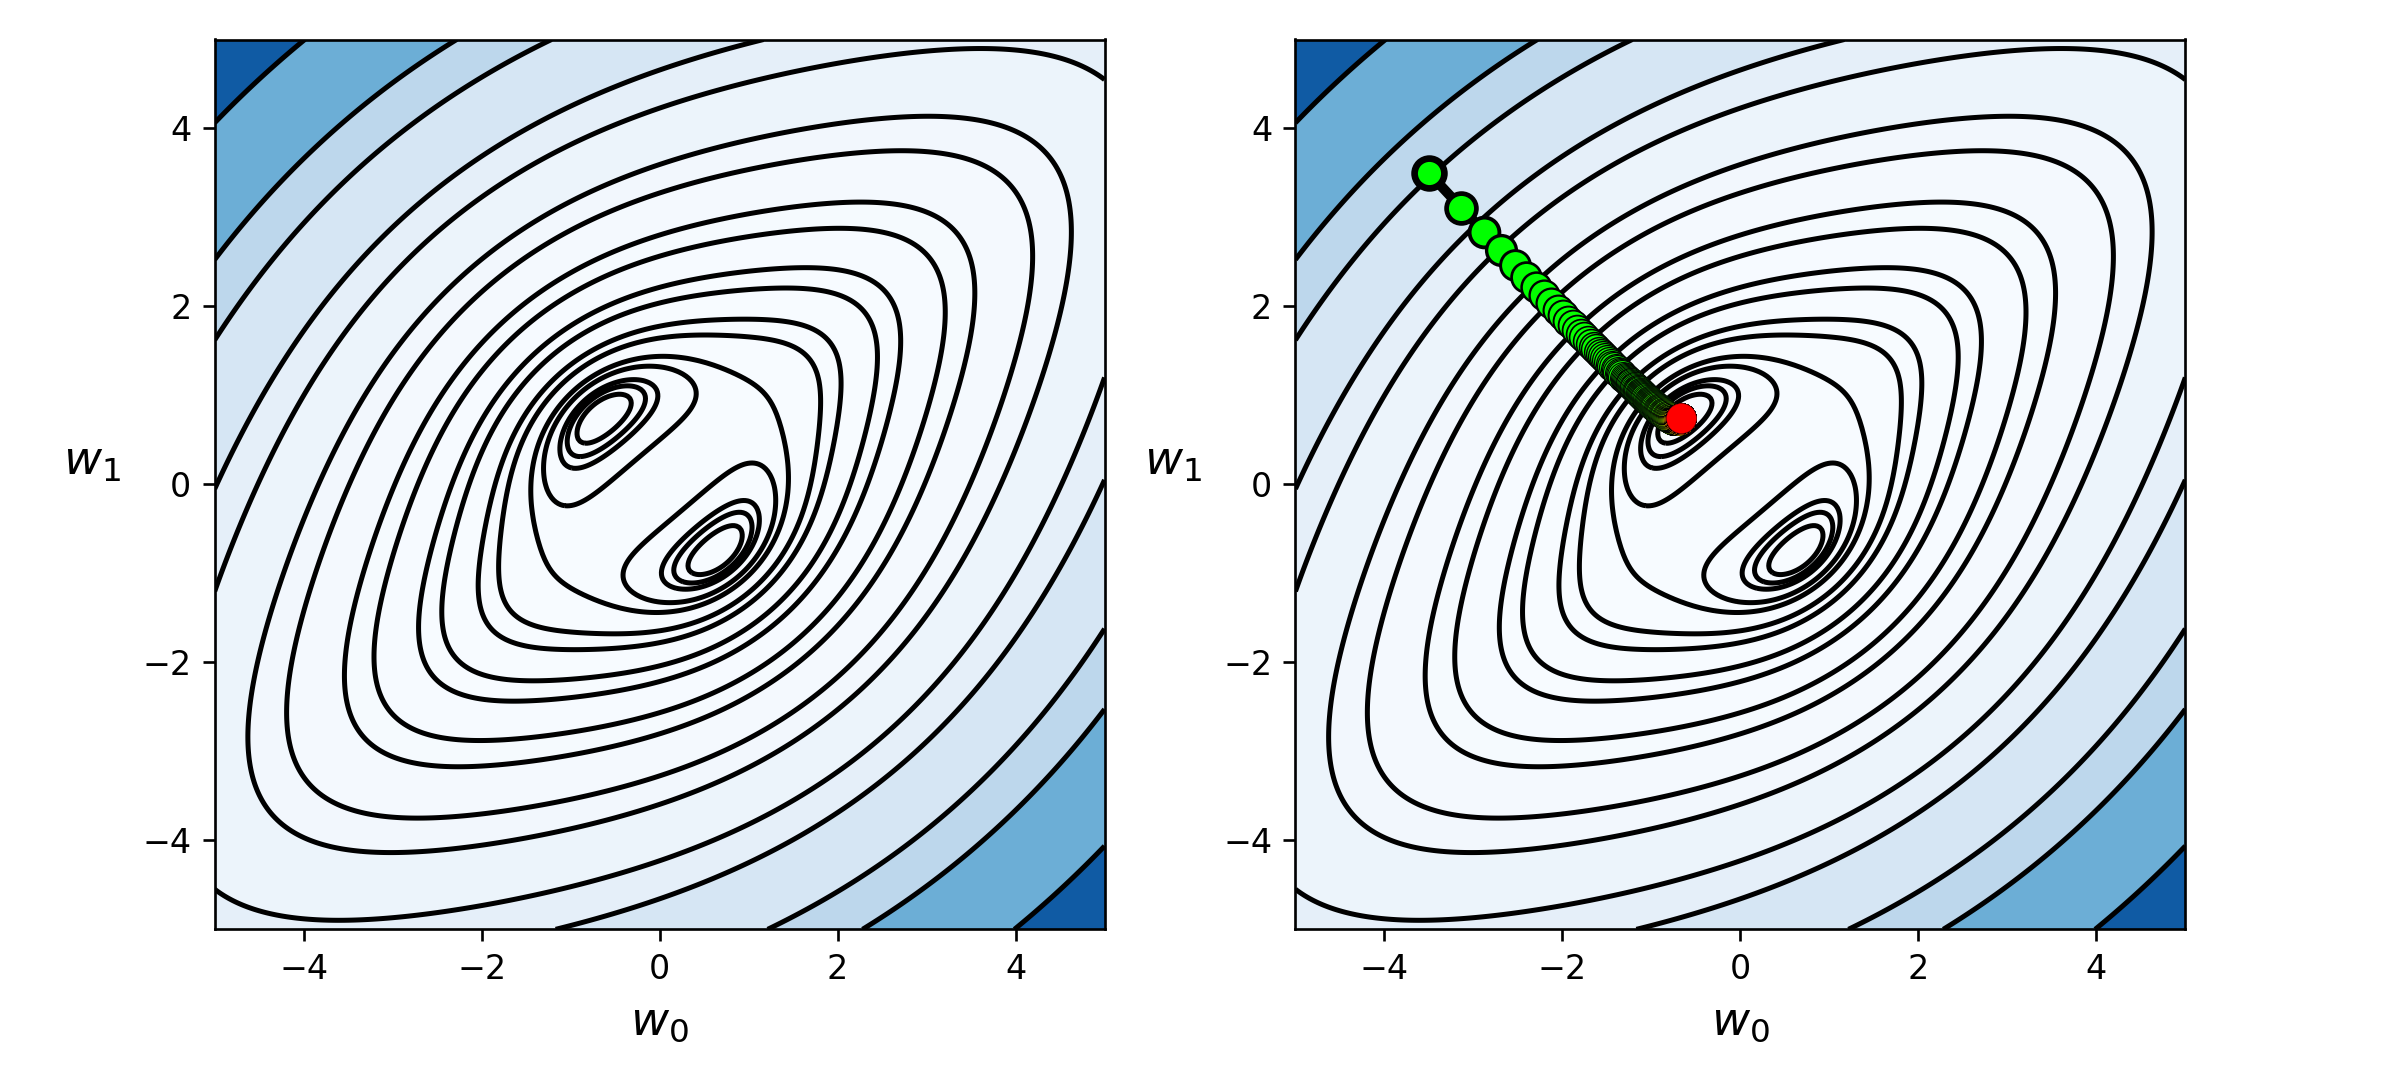

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# show run on contour plot
static_plotter.two_input_contour_plot(autoencoder,weight_history,xmin = -5,xmax = 5,ymin = -5,ymax = 5,num_contours = 40,show_original = True)

# Exercise 8.6. Producing a PCA basis

In [17]:
def center(X):
    '''
    A function for normalizing each feaure dimension of an input array, mean-centering
    and division by its standard deviation
    
    '''
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_normalized = X - X_means

    return X_normalized

def compute_pcs(X,lam):
    '''
    A function for computing the principal components of an input data matrix.  Both
    principal components and variance parameters (eigenvectors and eigenvalues of XX^T)
    are returned
    '''
    # create the correlation matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    D,V = np.linalg.eigh(Cov)
    return D,V

def pca_transform_data(X,**kwargs):
    '''
    A function for producing the full PCA transformation on an input dataset X.  
    '''
    # user-determined number of principal components to keep, and regularizer penalty param
    num_components = X.shape[0]
    if 'num_components' in kwargs:
        num_components = kwargs['num_components']
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']
    
    # compute principal components
    D,V = compute_pcs(X,lam)
    V = V[:,-num_components:]
    D = D[-num_components:]

    # compute transformed data for PC space: V^T X
    W = np.dot(V.T,X)
    return W,V

<IPython.core.display.Javascript object>


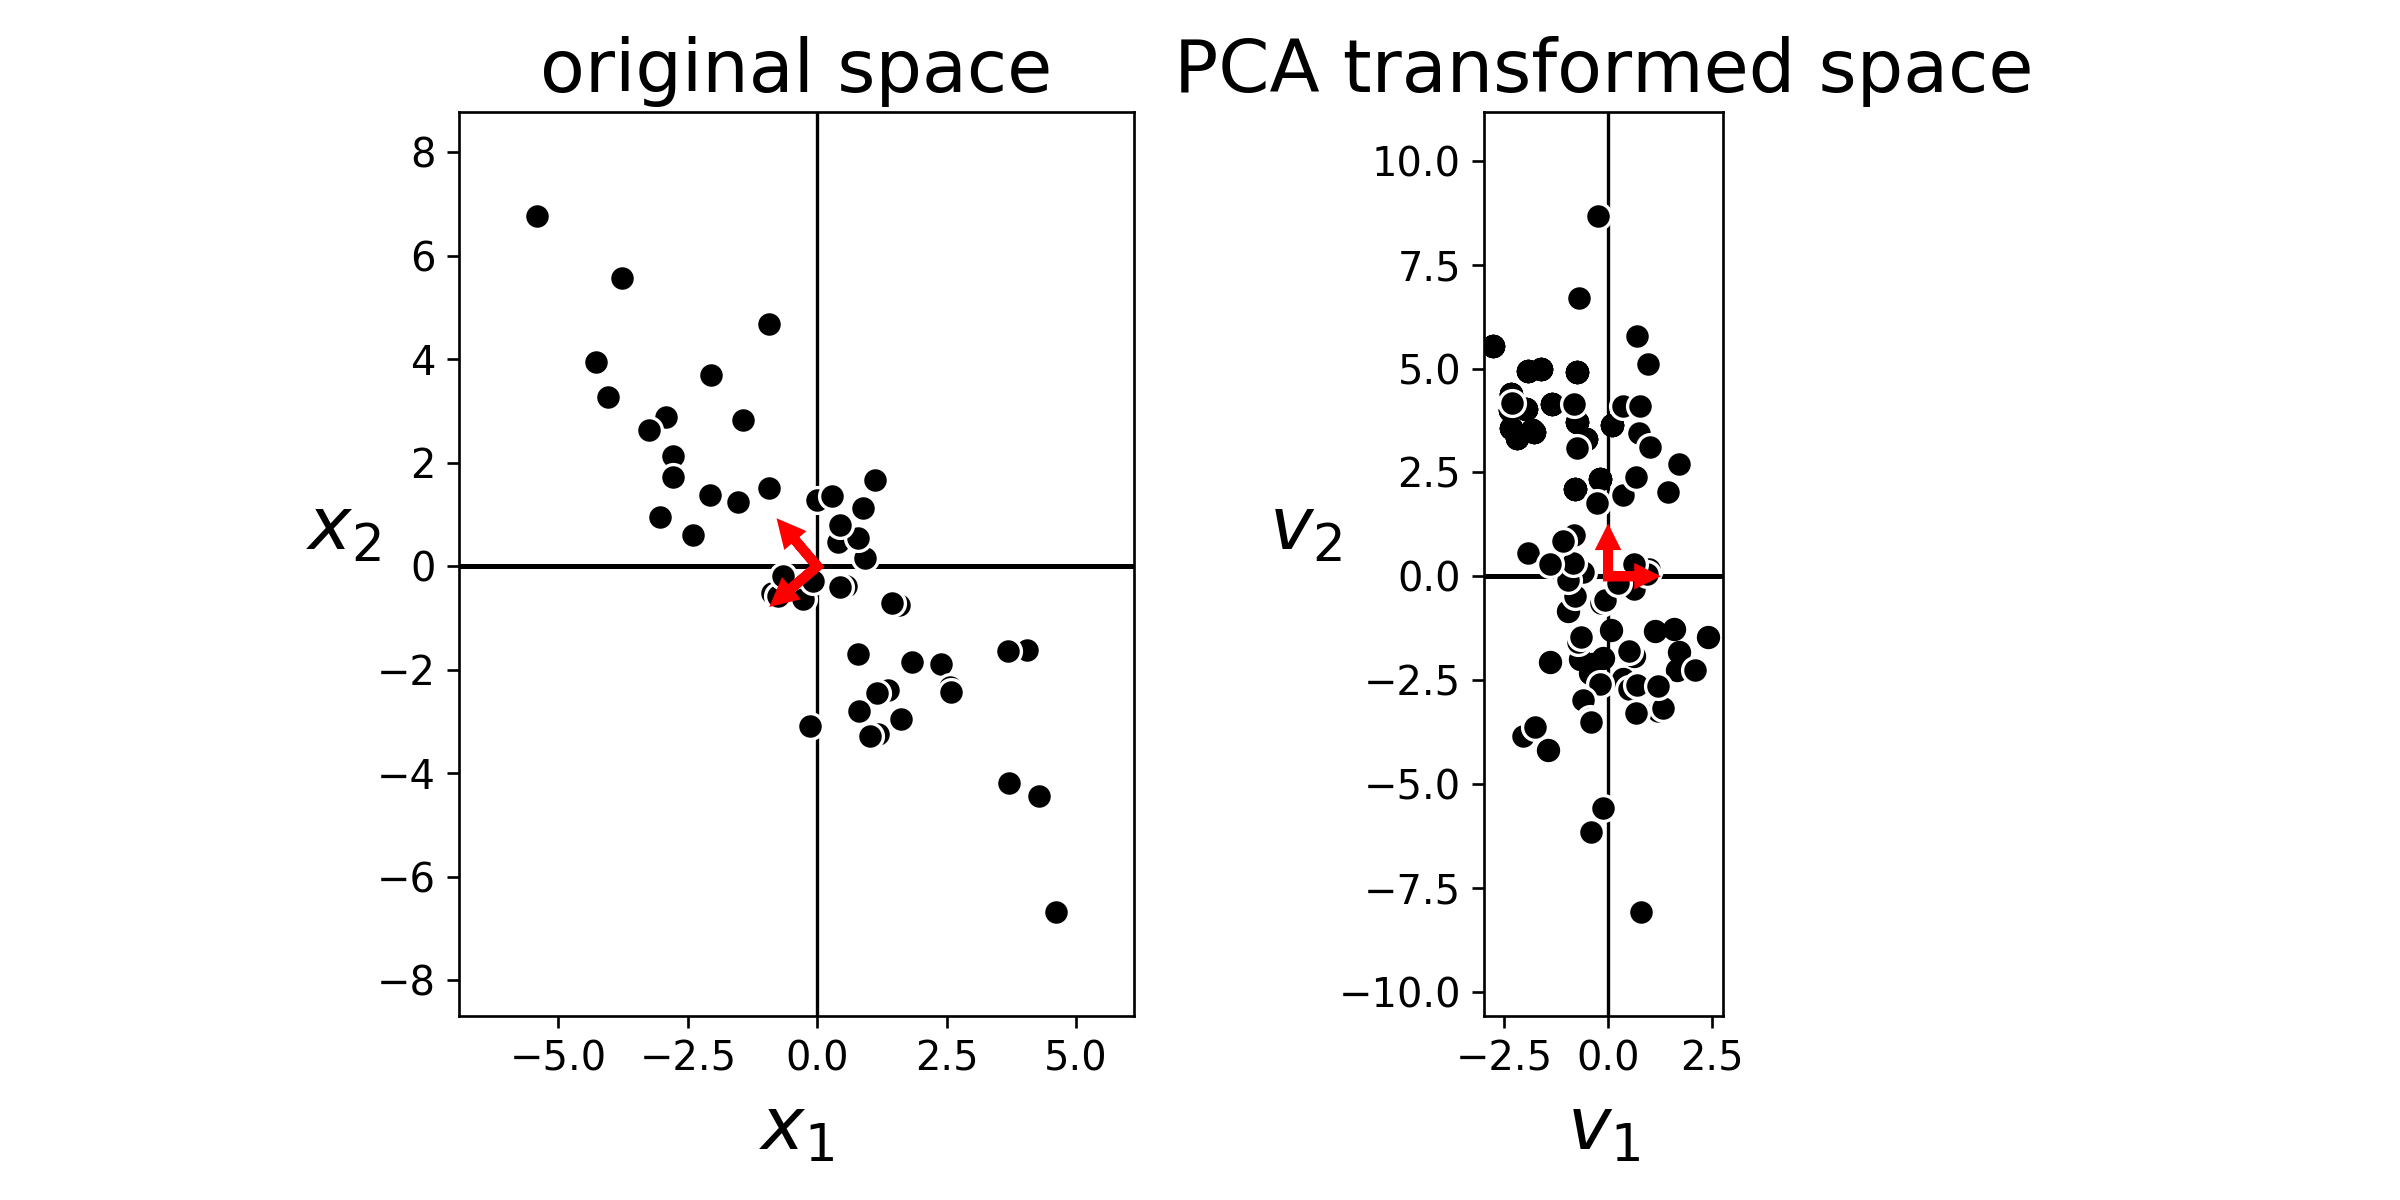

In [8]:
# load in dataset to perform PCA on, and mean-center
X_original = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')

# mean-center the data
X = center(X_original)

# compute the full PCA transformation of dataset
W,V = pca_transform_data(X)

# plot data in original and pca-transformed spaces
unsuplib.PCA_demos.pca_visualizer(X,W,V)

# Exercise 8.7. A warning example

In [5]:
data = np.loadtxt(datapath + 'PCA_class_data.csv',delimiter=',')
x = data[:,:2]
y = data[:,-1]

In [117]:
import matplotlib.pyplot as plt
def custom_plotter(x,y):
    x = center(x.T).T
    
    ind0 = np.argwhere(y == 1)
    plt.scatter(x[ind0,0],x[ind0,1],c='r')
    
    ind0 = np.argwhere(y == -1)
    plt.scatter(x[ind0,0],x[ind0,1],c='b')   
    plt.show()
    
    # project data onto first pc
    C,x_trans = pca_transform_data(x,num_components=2)
    C = C[-1,:][:,np.newaxis].T
    x = np.dot(C.T,np.dot(C,x.T)).T
    
    ind0 = np.argwhere(y == 1)
    plt.scatter(x[ind0,0],x[ind0,1],c='r')
    
    ind0 = np.argwhere(y == -1)
    plt.scatter(x[ind0,0],x[ind0,1],c='b')   
    plt.ylim([-0.16,0.16])
    plt.xlim([-0.5,0.5])
    
    # plot plane spanned by C
    C_line = np.array([t*C for t in np.linspace(-1,1,100)])
    C_line = C_line[:,0,:]
    plt.plot(C_line[:,0],C_line[:,1],c='g')
    plt.show()

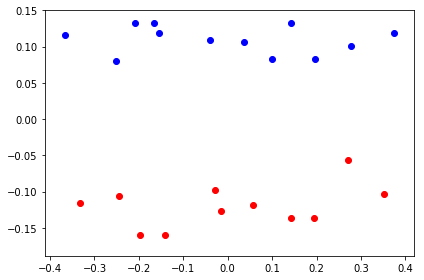

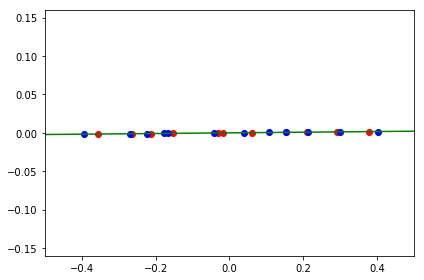

In [118]:
custom_plotter(x,y)

# Exercise 8.8. Perform K-Means

In [9]:
####### K-means functionality #######
# function for updating cluster assignments
def update_assignments(data,centroids):
    P = np.shape(data)[1]
    assignments = []
    for p in range(P):
        # get pth point
        x_p = data[:,p][:,np.newaxis]
        
        # compute distance between pth point and all centroids
        # using numpy broadcasting
        diffs = np.sum((x_p - centroids)**2,axis = 0)
        
        # determine closest centroid
        ind = np.argmin(diffs)
        assignments.append(ind)
    return np.array(assignments)
       
# update centroid locations
def update_centroids(data,old_centroids,assignments):
    K = old_centroids.shape[1]
    # new centroid container
    centroids = []
    for k in range(K):
        # collect indices of points belonging to kth cluster
        S_k = np.argwhere(assignments == k)
        
        # take average of points belonging to this cluster
        c_k = 0
        if np.size(S_k) > 0:
            c_k = np.mean(data[:,S_k],axis = 1)
        else:  # what if no points in the cluster?  keep previous centroid
            c_k = copy.deepcopy(old_centroids[:,k])[:,np.newaxis]
        centroids.append(c_k)
    centroids = np.array(centroids)[:,:,0]
    return centroids.T

# main k-means function
def my_kmeans(data,centroids,max_its):    
    # outer loop - alternate between updating assignments / centroids
    for j in range(max_its):
        # update cluter assignments
        assignments = update_assignments(data,centroids)
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids,assignments

In [22]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P,centers = 3)
data = np.transpose(blobs[0])

# scatter plot the dataset 
plt.scatter(data[0,:],data[1,:],c = 'k')
plt.show()


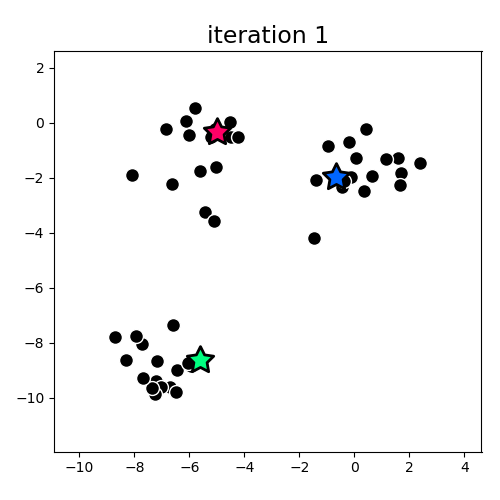
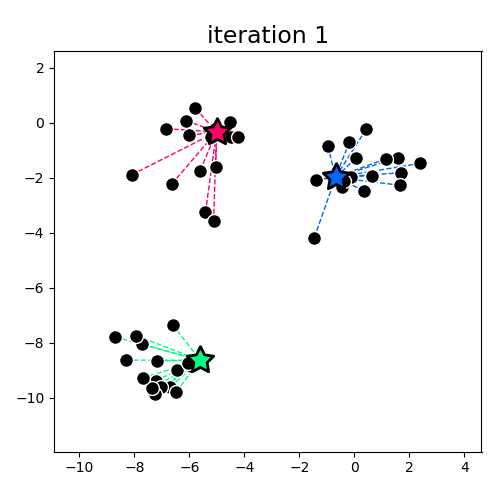
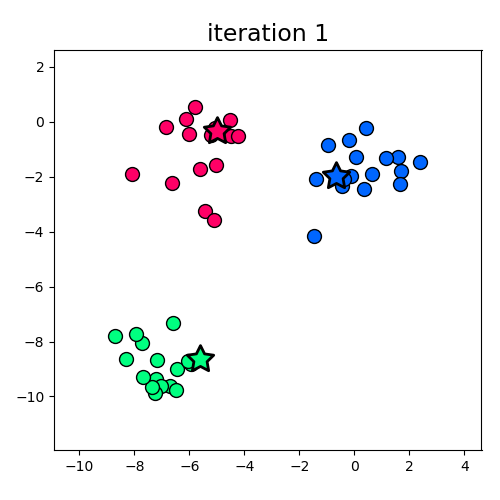
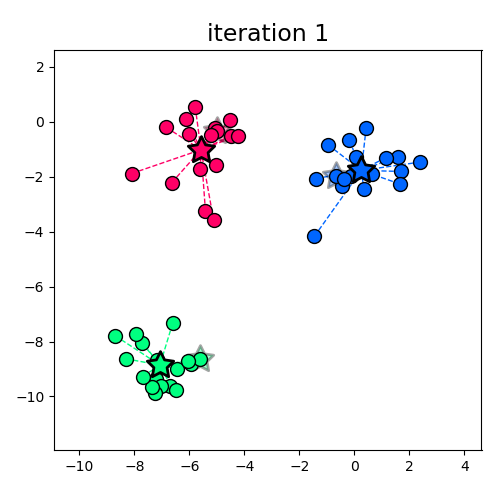
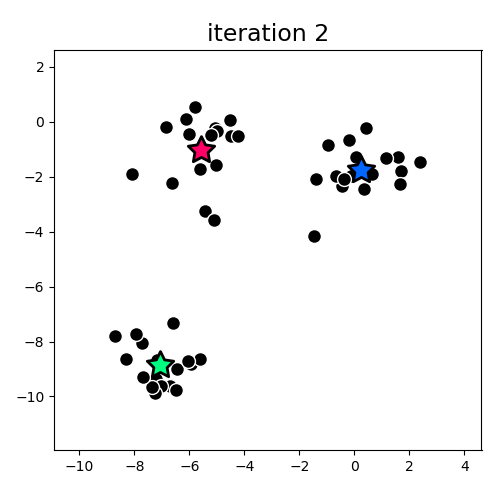
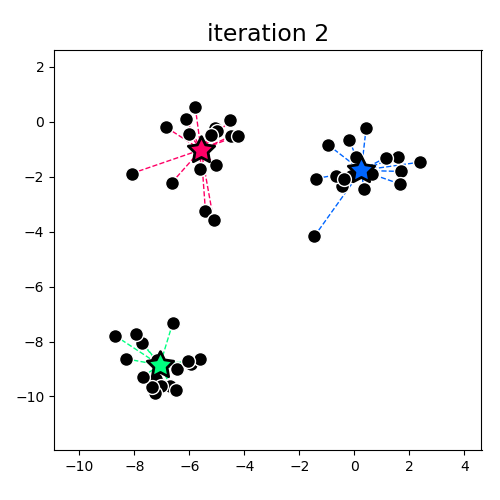
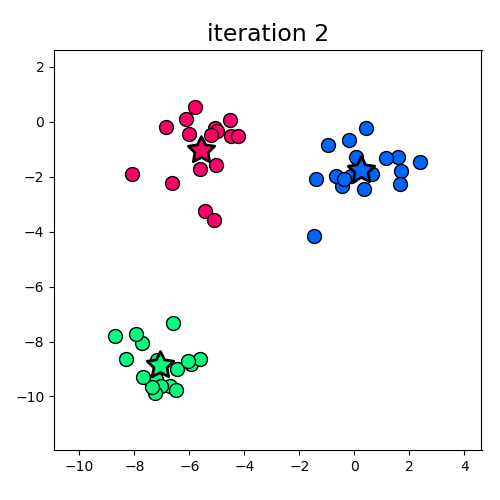
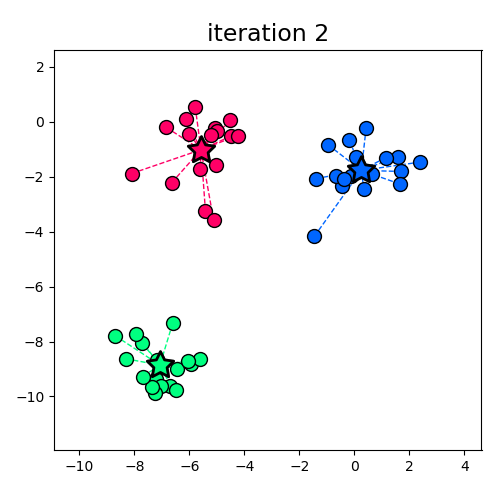
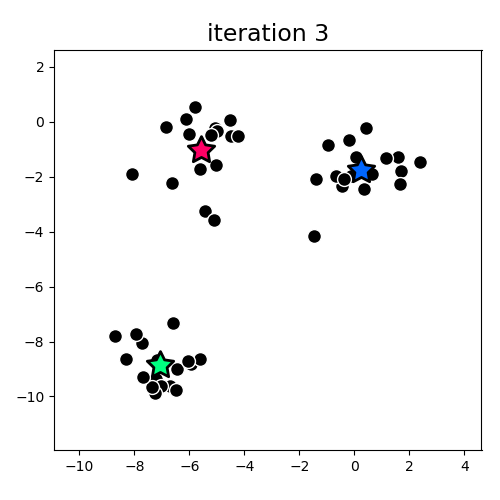
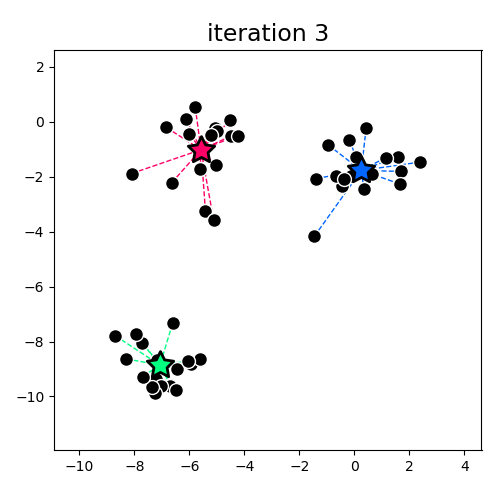
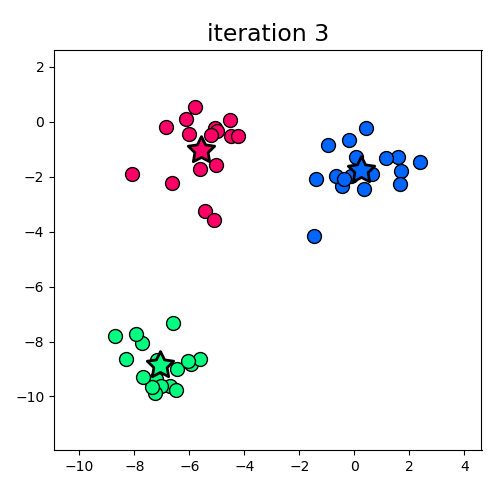
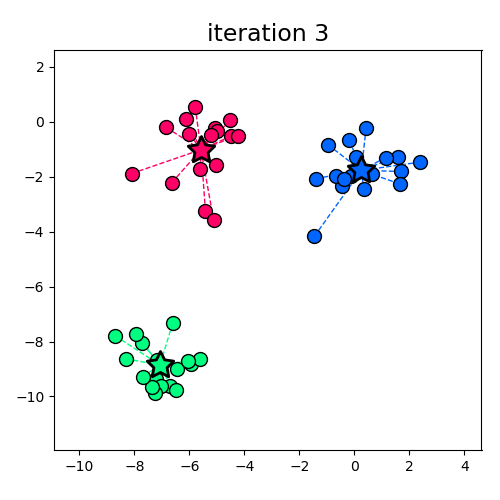
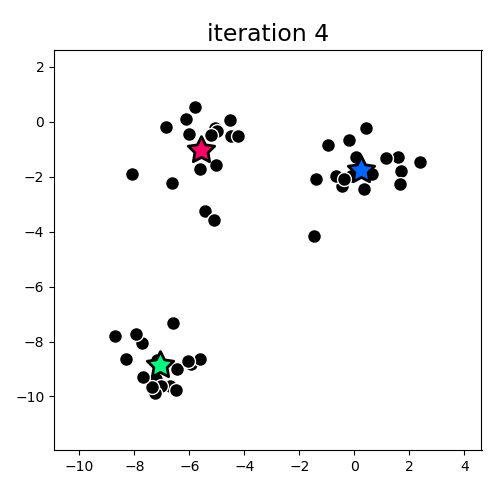
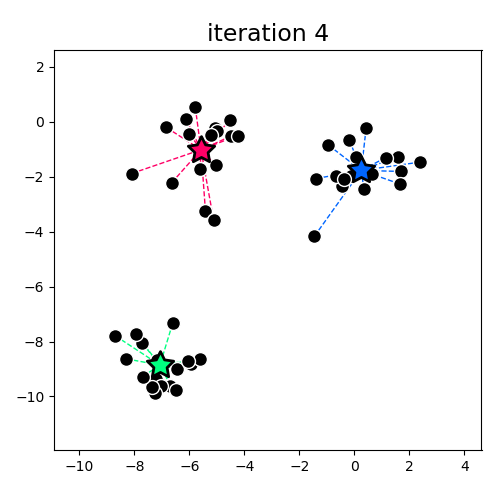
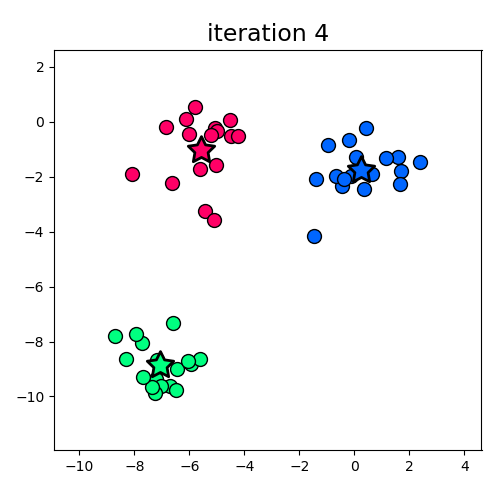
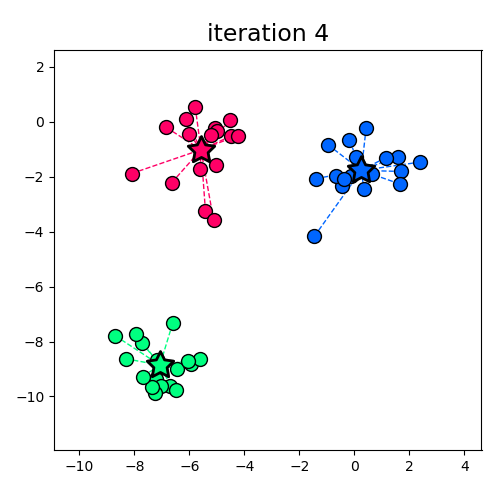
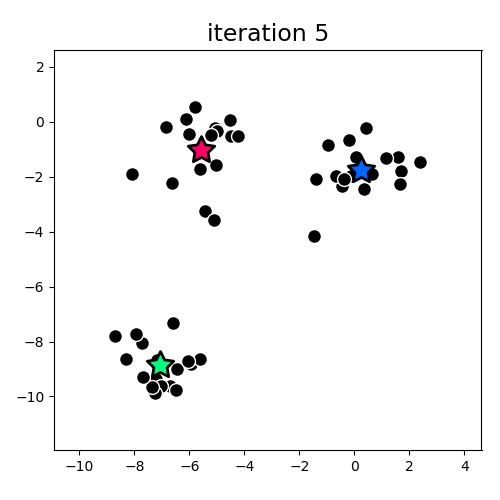
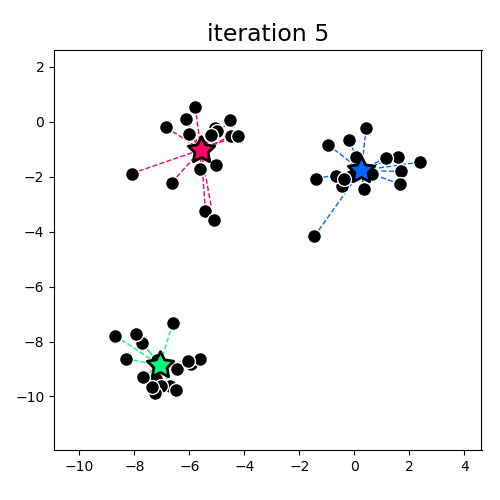
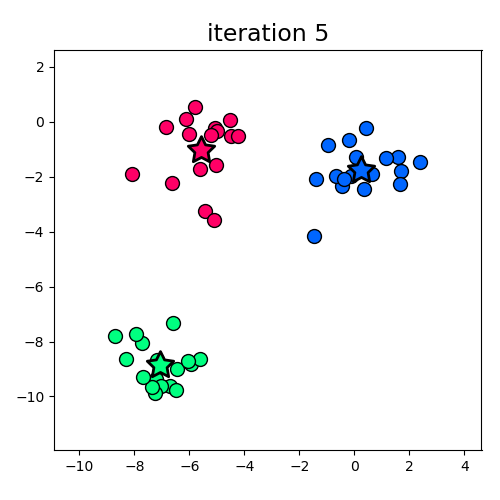
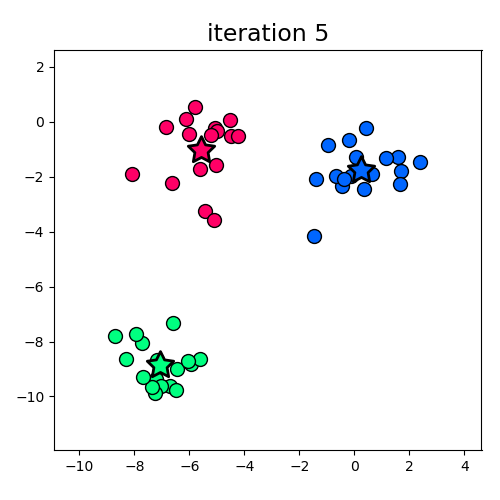

In [23]:
# initial centroids - here particular chosen
pt_inds = [20,21,22]
init_centroids = data[:,pt_inds]

# run K-means animator using Python implementation above
unsuplib.K_means_demos.run_animated_demo(data,init_centroids,max_its = 5)

# Exercise 8.9. Making a scree plot

<IPython.core.display.Javascript object>


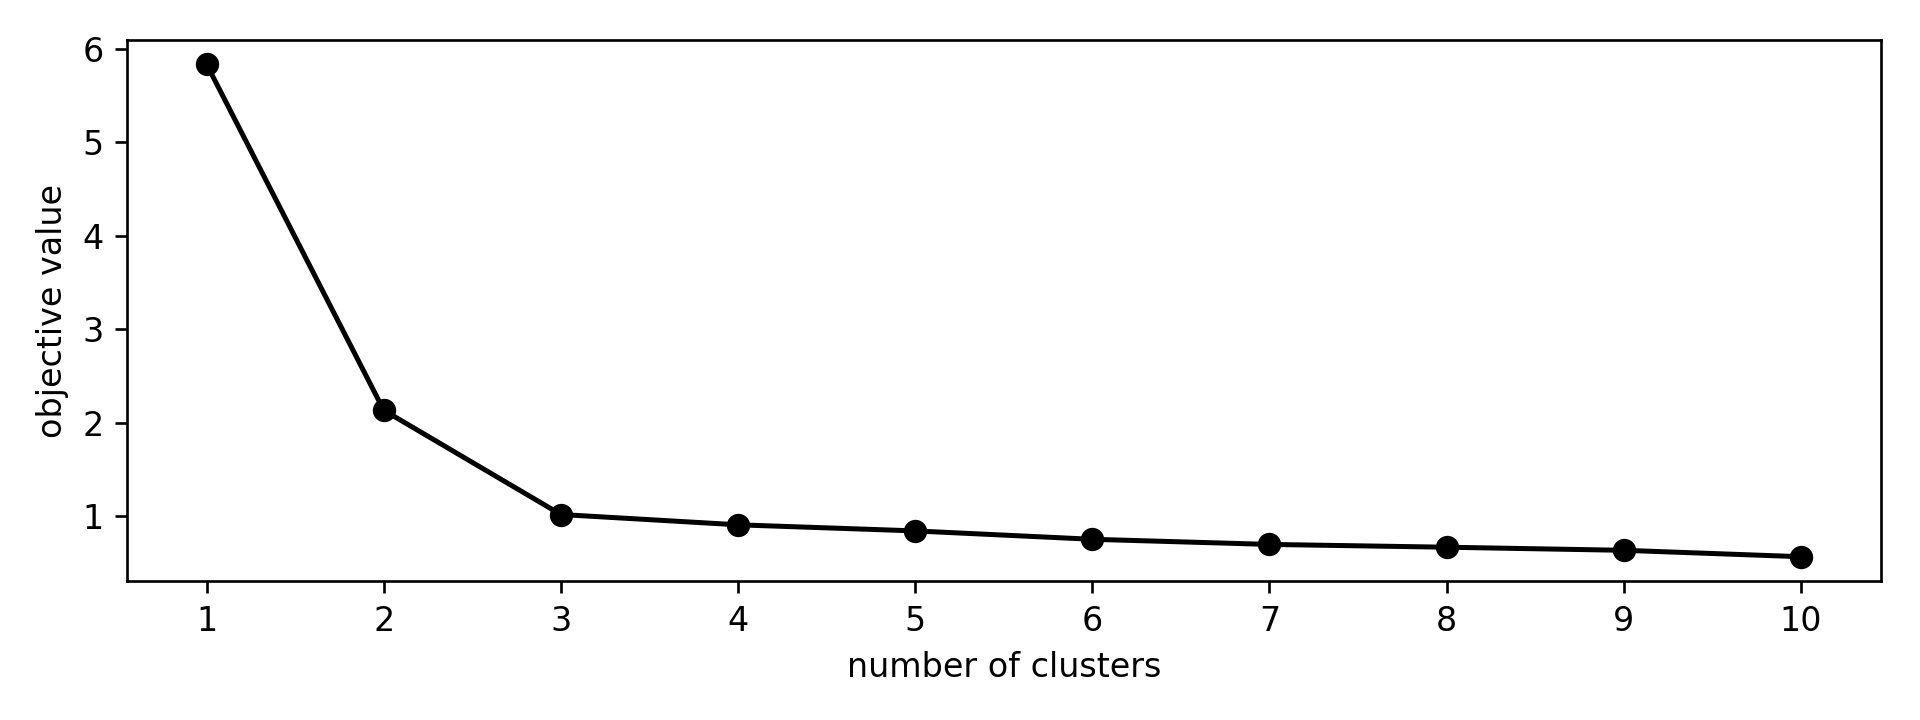

In [24]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P, random_state=1,centers = 3)
data = np.transpose(blobs[0])

# scree plot
K_range = [1,2,3,4,5,6,7,8,9,10]
unsuplib.K_means_demos.scree_plot(data,K_range,max_its = 10)

# Exercise 8.10. Alternating minimization

While the orthonormal PCA solution is by far more popular, we could in theory recover an infinite variety of spanning sets for our data in minimizing the Least Squares cost in equation (2) using standard optimization techniques including gradient descent and block-coordinate descent.  Here we discuss in particular the *block-coordinate* descent approach hinted at in Section 9.2.1 above, where we will use $K \leq N$ elements.  The main value in going through this exercise basis is that - as we will see - PCA is the prototypical method on which all other fundamental unsupervised methods (where we cannot derive special orthonormal solutions like we can with PCA) are based.  Because of this we will often see the use of block-coordinate descent in the future, with updates that closely mirror what we derive (in the relatively simpler context of PCA).

So - how do we go about cooking up a block-coordinate descent method for minimizing the Least Squares cost for PCA in equation (2) - again assuming we use an arbitrary $K \leq N$ basis elements?  First note that there are a number of ways we can express equation (2) and multiple orders in which we could perform block-updates on its parameters.  For the sake of consistency with the natural block-update structure we will see with further unsupervised learning methods, here update *one column of parameters at a time*.  To do this we first  re-write equation (2) by expressing each multiplication $\mathbf{C}_{\,}\mathbf{w}_p = \sum_{n=1}^K\mathbf{c}_nw_{n,p}$ in terms of the *columns* of $\mathbf{C}$ (as in equation (1)).  Doing this we can write equation (2) equivalently (again assuming the use of $K \leq N$ basis vectors $\mathbf{c}_1,...,\mathbf{c}_K$) exposing each set of parameters as a column vector as 

\begin{equation}
g\left(\mathbf{w}_1,...,\mathbf{w}_P,\mathbf{c}_1,...,\mathbf{c}_K\right) = \frac{1}{P}\sum_{p = 1}^P \left \Vert \sum_{n=1}^K\mathbf{c}_nw_{n,\,p} - \mathbf{x}_p \right\Vert_2^2
\end{equation}

where $w_{n,\,p}$ denotes the $n^{th}$ element of $\mathbf{w}_p$.


To minimize our cost function one-column of parameters at a time we first sweep through $\mathbf{w}_1$ through $\mathbf{w}_P$, solving the first order system in each case (keeping all other parameters fixed).  Then we do the same for $\mathbf{c}_1$ through $\mathbf{c}_K$.  Beginning with the weights it is straight forward to confirm (as we computed in Section 9.1.1 when computing weights for a fixed basis representation) that the first order system for each $\mathbf{w}_p$ is given as 

\begin{equation}
\mathbf{C}^T\mathbf{C}^{\,}\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P .
\end{equation}

Since $\mathbf{C}$ is an $N \times K$ matrix, each of these systems is $K\times K$, symmetric, and linear.  Hence we can solve the $p^{th}$ easily via e.g., coordinate descent in the individual elements of $\mathbf{w}_p$.

Remember that *regularizing* a system like this often helps avoid numerical instability issues associated with solving linear systems like this in practice.   To do this we add a weighted identity to the matrix of the system - here $\mathbf{C}^T\mathbf{C}^{\,}$ - meaning that in practice here we often solve linear systems of the following adjusted form

\begin{equation}
\left(\mathbf{C}^T\mathbf{C}^{\,} + \lambda\mathbf{I}_{K\times K} \right)\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, p=1...P 
\end{equation}

where $\lambda \geq 0$ is typically set to some small value (like e.g., $10^{-5}$).

Once each of these weight updates is made we can then move on to solve the first order system in each column of $\mathbf{C}$.  Again one can quickly check (using the re-written form of equation (2) above) that the $n^{th}$ of these updates each these updates takes the exceedingly simple form

\begin{equation}
\mathbf{c}_n = \frac{\sum_{p=1}^P \mathbf{x}_p w_{n,\,p} } {\sum_{p=1}^P w_{n,\,p}^2}\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, n=1...K.
\end{equation}

Practically speaking, to guard against the possibility where the denominator of one of these fractions is extremely small or zero it is commonplace here to also *regularize* each 'system' by adding a small nonnegative value to the denominator of each update formula above.  Hence instead of the updates above we typically in practice solve for the related updates

\begin{equation}
\mathbf{c}_n = \frac{\sum_{p=1}^P \mathbf{x}_p w_{n,\,p} } {\sum_{p=1}^P w_{n,\,p}^2 + \lambda} \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, n=1...K
\end{equation}

where $\lambda \geq 0$ is some small value (like e.g., $10^{-5}$).

Taken together, the regularization of both sets of optimization vectors introduced to avoid numerical issues is actually equivalent to regularizing both in the original cost function.  Using the same parameter $\lambda$ for both sets of variables this regularized Least Squares cost function PCA looks like the following

\begin{equation}
g\left(\mathbf{w}_1,...,\mathbf{w}_P,\mathbf{c}_1,...,\mathbf{c}_K\right) = \frac{1}{P}\sum_{p = 1}^P \left \Vert \sum_{n=1}^K\mathbf{c}_nw_{n,\,p} - \mathbf{x}_p \right\Vert_2^2 + \frac{\lambda}{P}\sum_{n=1}^K\left\Vert \mathbf{c}_n \right \Vert_2^2 + \frac{\lambda}{P}\sum_{p=1}^P\left\Vert \mathbf{w}_p \right \Vert_2^2.
\end{equation}

And indeed checking the first order condition in each vector of parameters will find that they lead precisely to the regularized update formula given above.

In any case - repeating these updates multiple times produces convergence to an ideal basis / set of weight vectors for the dataset.  Moreover this particular formulation of the block-coordinate approach is simple to implement and - as we will see - is a prototype algorithm for many other fundamental linear unsupervised learning methods (as we will see in the forthcoming Sections).  Pseudo-code containing this algorithm is given below, followed by a Python implementation and computational example employing it.

### PCA algorithm  (block-coordinate descent) 

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; <strong>input:</strong> a number $K \leq N$ of desired principal components, dataset $\mathbf{x}_1,...,\mathbf{x}_P$, initializations for basis $\mathbf{c}_1,...,\mathbf{c}_K$, reguliarzation parameter $\lambda$, and maximum number of iterations $\text{max_its}$ <br>

<strong>2:</strong>&nbsp;&nbsp; <code>compute</code> mean of dataset $\boldsymbol{\mu} = \frac{1}{P}\sum_{p=1}^P\mathbf{x}_p$ and center data as $\mathbf{x}_p \longleftarrow \mathbf{x}_p - \boldsymbol{\mu}$ for $p=1,...,P$ <br> 

<strong>3:</strong>&nbsp;&nbsp; <code>for</code> $\,\,i = 1,\ldots,\text{max_its}$<br>

<strong>4:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code># Update weight vectors</code><br>

<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>for</code> $\,\,p = 1,\ldots,P$<br>

<strong>6:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code> solve </code> $\left(\mathbf{C}^T\mathbf{C}^{\,} + \lambda \mathbf{I}_{K\times K}\right)\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p$ for $\mathbf{w}_p$ <br>

<strong>7:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>end for</code><br>

<strong>8:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code># Update basis</code><br>

<strong>9:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>for</code> $\,\,n = 1,\ldots,K$<br>

<strong>10:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code> solve </code> $\mathbf{c}_n = \frac{\sum_{p=1}^P \mathbf{x}_p w_{n,p} } {\sum_{p=1}^P w_{n,p}^2 + \lambda}$<br>

<strong>11:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code>end for</code><br>

<strong>12:</strong>&nbsp; <code>end for</code><br>

<strong>13:</strong>&nbsp;&nbsp; <code># Update weights on final basis</code><br>


<strong>14:</strong>&nbsp;&nbsp;&nbsp; <code>for</code> $\,\,p = 1,\ldots,P$<br>

<strong>15:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <code> solve </code> $\left(\mathbf{C}^T\mathbf{C}^{\,} + \lambda \mathbf{I}_{K\times K}\right)\mathbf{w}_p = \mathbf{C}^T\mathbf{x}_p$ for $\mathbf{w}_p$ <br>

<strong>16:</strong>&nbsp;&nbsp; <code>end for</code><br>

<strong>17:</strong>&nbsp; <strong>output:</strong> optimal PCA basis $\mathbf{c}_1,...,\mathbf{c}_K$ and weights $\mathbf{w}_1,...,\mathbf{w}_P$<br>

<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>